Wybieramy temat. Może być to temat z pierwszego projektu. Jeśli pozostajemy przy tym 
samym temacie musimy znaleźć zmienną celu. 
2. Dokonujemy eksploracji zbioru. Uzupełniamy braki danych. Dokonujemy wstępnej selekcji 
zmiennych.   
3. Dzielimy zbiór danych na treningowy testowy i w miarę możliwości na walidacyjny. 
4. Tworzymy minimum 3 modele predykcyjne (może być ich więcej) wraz z dostrojeniem 
hiperparametrów. 
5. Porównać i wybrać najlepszy model. 
6. Dokonać ostatecznej oceny wybranego modelu na zbiorze walidacyjnym. 
7. Wskazać uzysk dla firmy / odbiorcy (np. ile pieniędzy z tego będzie miała, jak wdrożenie 
wpłynie na rozpoznawalność przypadków, dla których firma wykona działania prewencyjne 
itd.) 
8. Stworzenie aplikacji wykorzystującej model 
9. Na prezentacji powinna znaleźć się krótka analiza zmiennych, omówienie wyników 
wszystkich zastosowanych technik modelowania i ich porównanie, wybór modelu i przede 
wszystkim wartość dodana jaką niesie za sobą wdrożenie

4. Odejdzie  czy nie odejdzie?  – prognozowanie zjawiska churn wśród Klientów telecom  
• Prognozowanie czy jest zagrożenie, że Klient zrezygnuje z usług firmy 
• Aplikacja dla pracowników informująca o zagrożeniu odejścia Klienta 
• https://www.kaggle.com/blastchar/telco-customer-churn 
 


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from plotly.subplots import make_subplots


### Data exploration

In [8]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [9]:
df_telco = df

In [10]:
df_telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
#checking data type

df_telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df_telco["TotalCharges"][488]

' '

In [15]:
#replacing empty string with 0 value in TotalCharges, line 488

df_telco["TotalCharges"] = df_telco["TotalCharges"].replace([" "],0)

In [16]:
#changing data type in column TotalCharges to float

df_telco["TotalCharges"] = pd.to_numeric(df_telco["TotalCharges"])

In [17]:
#replacing object with space 

df_telco["gender"] = df_telco["gender"].replace(["Female "],["Female"])
df_telco["gender"] = df_telco["gender"].replace(["Male "],["Male"])
df_telco = df_telco.replace(["Yes "],["Yes"])
df_telco = df_telco.replace(["No "],["No"])
df_telco = df_telco.replace(["No phone service "],["No phone service"])
df_telco = df_telco.replace(["DSL "],["DSL"])
df_telco = df_telco.replace(["Fiber optic "],["Fiber optic"])
df_telco = df_telco.replace(["No internet service "],["No internet service"])
df_telco = df_telco.replace(["Month-to-month "],["Month-to-month"])
df_telco = df_telco.replace(["One year "],["One year"])
df_telco = df_telco.replace(["Two year "],["Two year"])
df_telco = df_telco.replace(["Electronic check "],["Electronic check"])
df_telco = df_telco.replace(["Mailed check "],["Mailed check"])
df_telco = df_telco.replace(["Bank transfer (automatic) "],["Bank transfer (automatic)"])
df_telco = df_telco.replace(["Credit card (automatic) "],["Credit card (automatic)"])


In [18]:
#checking unique values

df_telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [19]:
#checking null values

df_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
#checking and deleting duplicates

df_telco.duplicated().sum()

df_telco = df_telco.drop_duplicates()

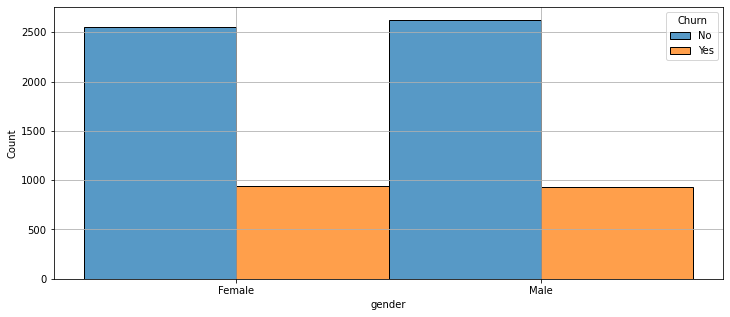

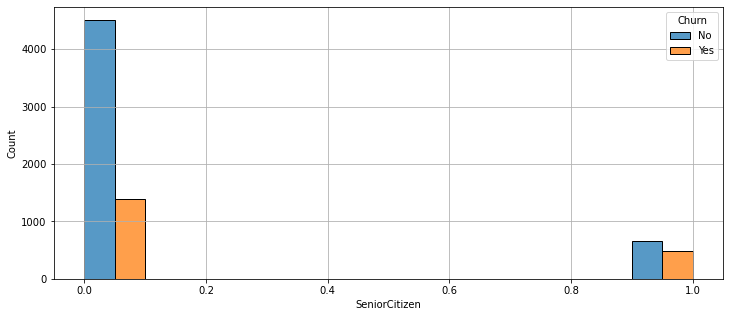

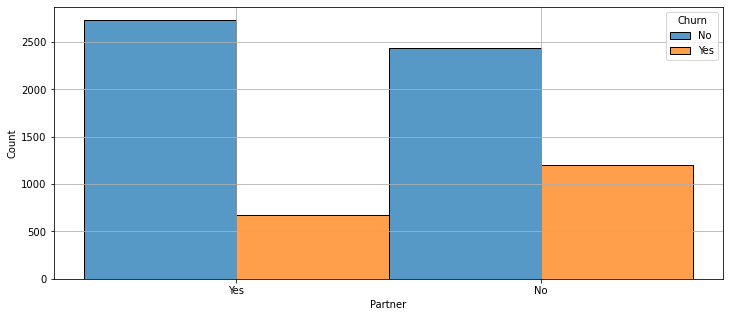

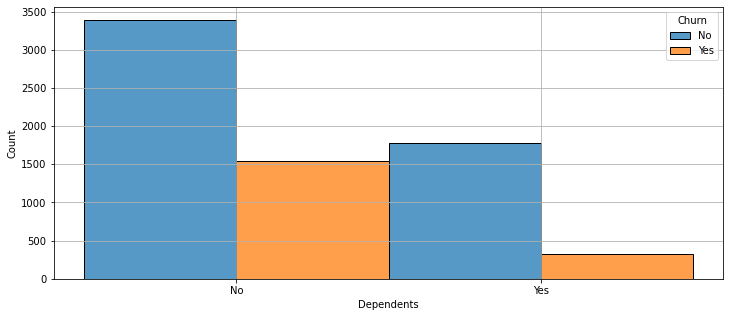

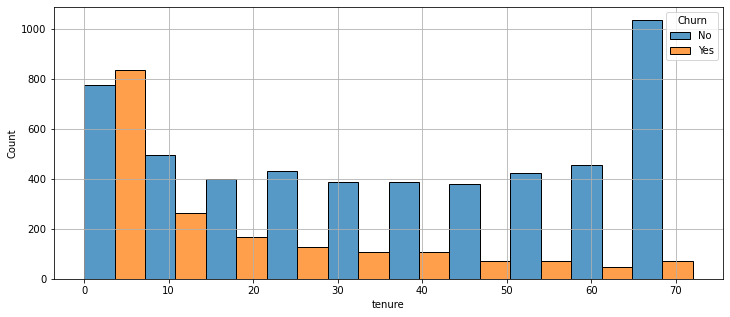

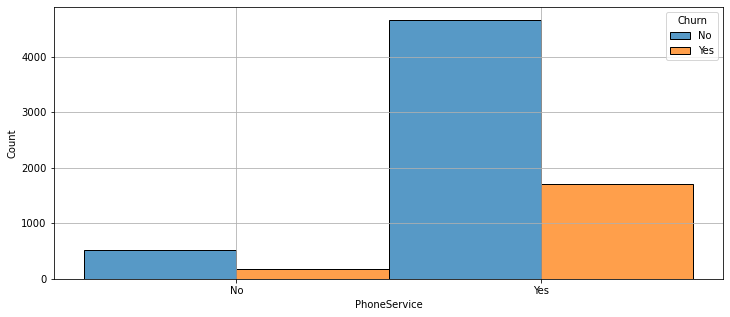

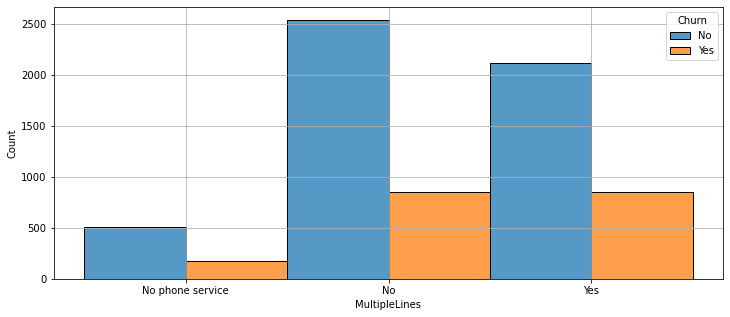

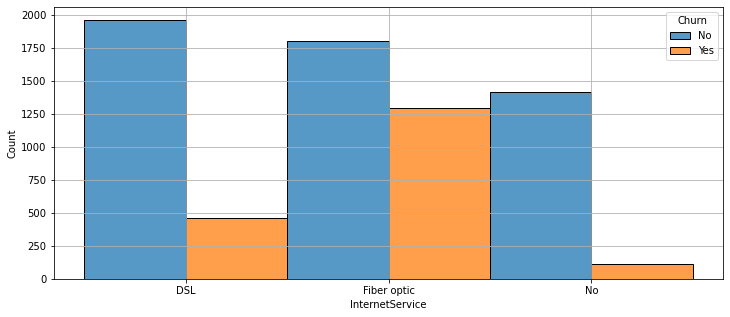

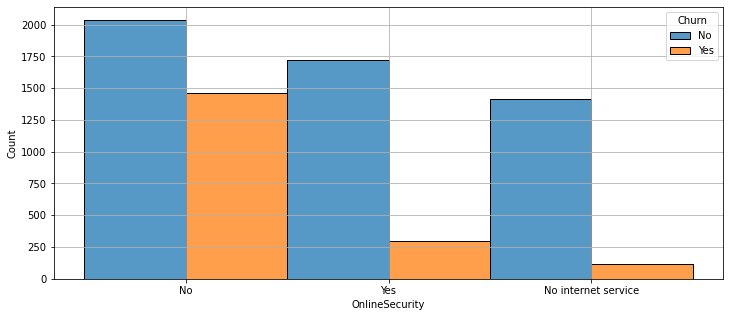

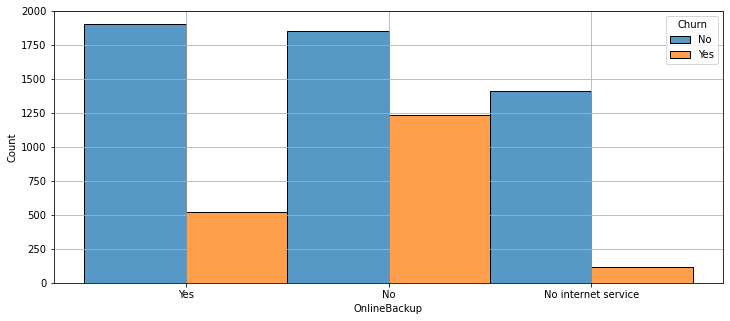

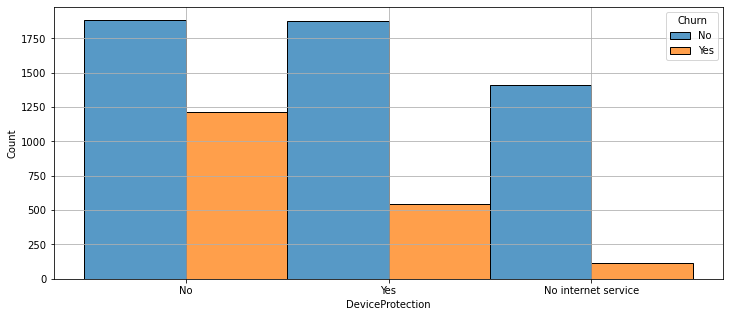

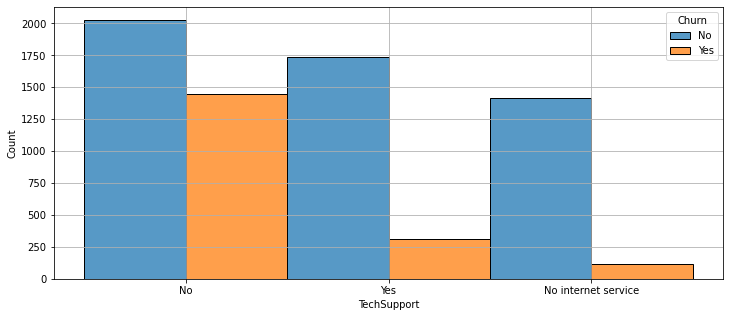

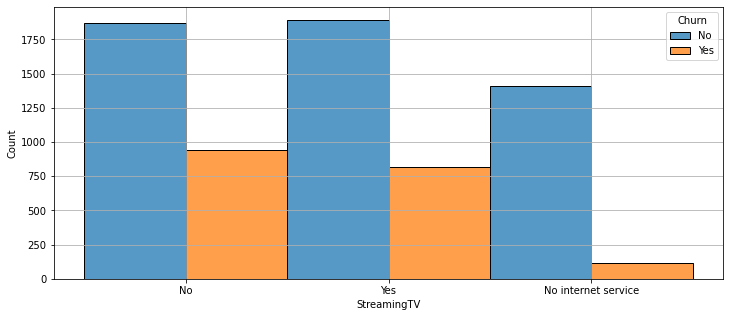

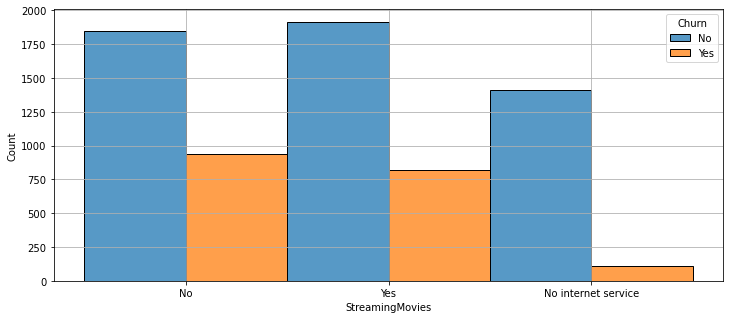

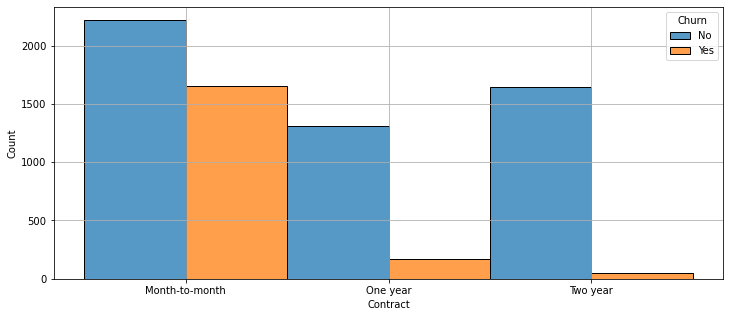

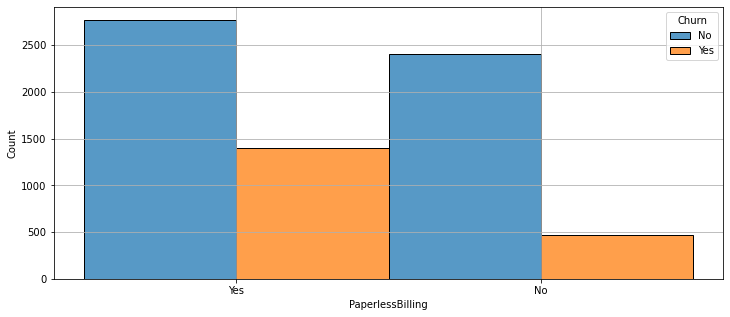

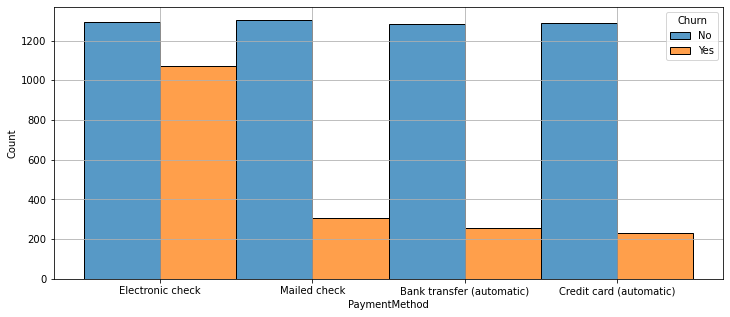

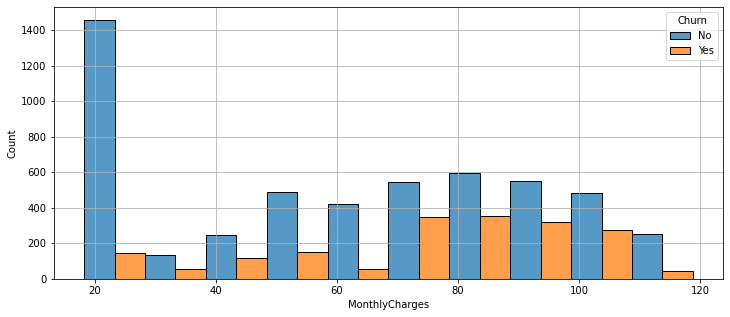

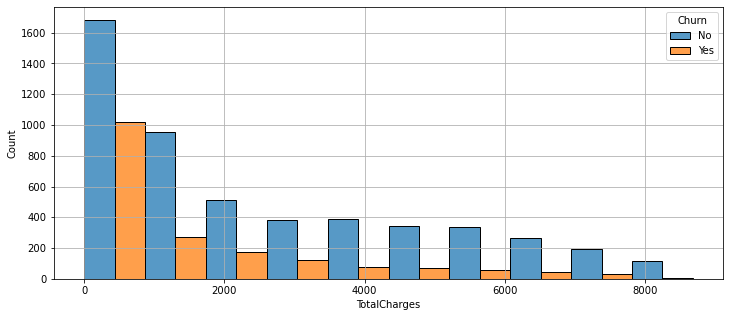

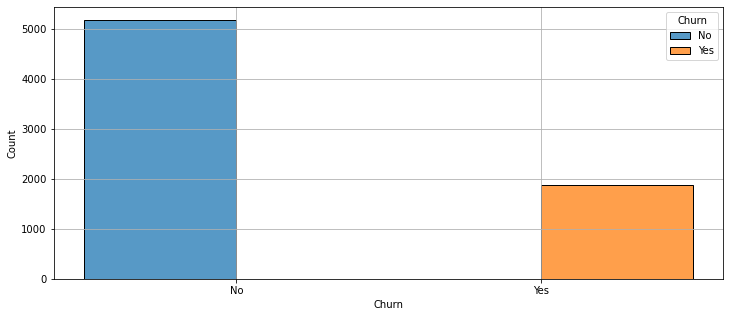

In [21]:
for column in df_telco.drop(columns = "customerID").columns:
    fig = plt.figure(figsize=(12,5))
    sns.histplot(data = df_telco, x = column, bins=10, hue = "Churn", multiple="dodge")
    plt.grid()
    plt.show()

In [22]:
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [23]:
#replacin YES/NO records with 0/1

df_telco = df_telco.replace(["Yes"],1)
df_telco = df_telco.replace(["No"],0)

df_telco

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,No phone service,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [24]:
#deleting customerID column

df_telco = df_telco.drop(columns = "customerID")
df_telco

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,Female,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,Female,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,Male,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [25]:
#get dummies function

df_telco = pd.get_dummies(df_telco)
df_telco

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,29.85,29.85,0,1,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,56.95,1889.50,0,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,1,53.85,108.15,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,0,42.30,1840.75,0,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,1,70.70,151.65,1,1,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,1990.50,0,0,...,0,1,0,0,1,0,0,0,0,1
7039,0,1,1,72,1,1,103.20,7362.90,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,1,1,11,0,1,29.60,346.45,0,1,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,0,4,1,1,74.40,306.60,1,0,...,1,0,0,1,0,0,0,0,0,1


In [26]:
#correlation

df_telco.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.103006,0.150889,0.001874,...,0.034210,0.120176,-0.182742,0.138360,-0.046262,-0.117000,-0.016159,-0.024135,0.171718,-0.153477
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,0.317504,-0.150448,0.001808,...,-0.117529,0.117412,0.000615,-0.280865,0.082783,0.248091,0.110706,0.082029,-0.083852,-0.095125
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,0.062078,-0.164221,-0.010517,...,-0.078198,-0.039741,0.139812,-0.231720,0.068368,0.204613,0.052021,0.060267,-0.150642,0.059071
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,0.826178,-0.352229,-0.005106,...,-0.252220,0.286111,-0.039062,-0.645561,0.202570,0.558533,0.243510,0.233006,-0.208363,-0.233852
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.113214,0.011942,0.006488,...,-0.112254,-0.032959,0.172209,-0.000742,-0.002791,0.003519,0.007556,-0.007721,0.003062,-0.003319
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.158574,0.191825,0.011754,...,0.059488,0.211716,-0.321013,0.169096,-0.051391,-0.147889,-0.016332,-0.013589,0.208865,-0.205398
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.651174,0.193356,0.014569,...,0.018075,0.627429,-0.763557,0.060165,0.004904,-0.074681,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.317504,0.062078,0.826178,0.113214,0.158574,0.651174,1.000000,-0.198324,0.000080,...,-0.202188,0.520122,-0.375223,-0.444255,0.170814,0.354481,0.185987,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,-0.198324,1.000000,0.008612,...,0.130845,0.061382,-0.227890,0.405103,-0.177820,-0.302253,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,0.001808,-0.010517,-0.005106,0.006488,0.011754,0.014569,0.000080,0.008612,1.000000,...,-0.005374,0.010487,-0.006026,0.003386,-0.008026,0.003695,0.016024,-0.001215,-0.000752,-0.013744


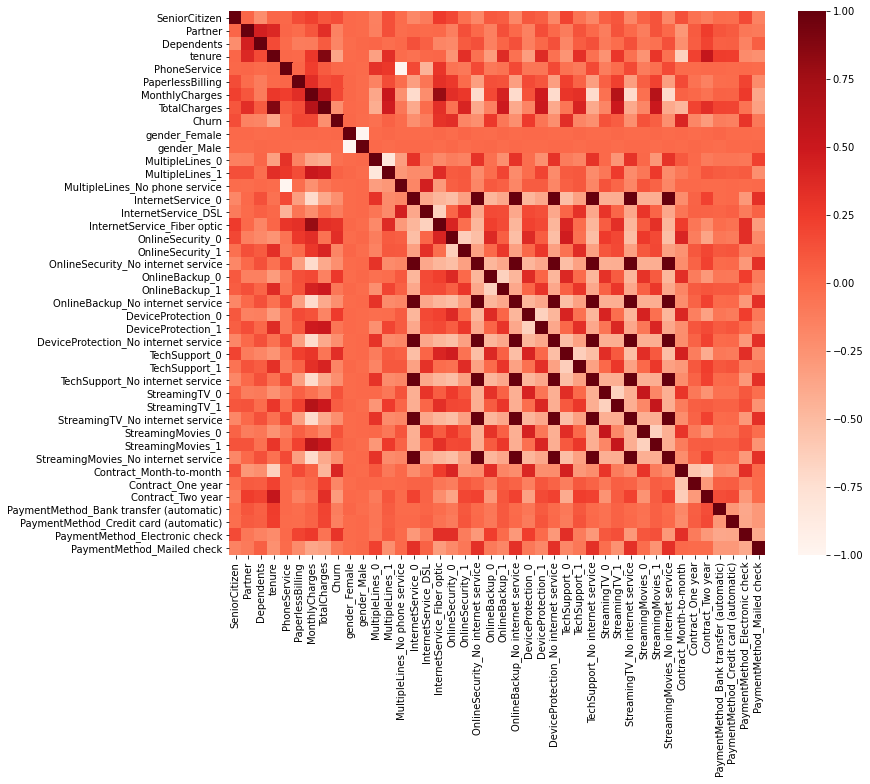

In [27]:
#correlation plot
plt.figure(figsize=(12,10))
cor = df_telco.corr(method="spearman")
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [28]:
df_telco.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.734304,0.265370,0.495244,...,0.395428,0.387903,0.216669,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.794470,0.441561,0.500013,...,0.488977,0.487307,0.412004,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
df_telco[df_telco["Churn"] == 1].describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.0,1869.000000,...,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000,1869.000000
mean,0.254682,0.357945,0.174425,17.979133,0.909042,0.749064,74.441332,1531.796094,1.0,0.502408,...,0.501873,0.437667,0.060460,0.885500,0.088818,0.025682,0.138042,0.124131,0.573034,0.164794
std,0.435799,0.479524,0.379576,19.531123,0.287626,0.433668,24.666053,1890.822994,0.0,0.500128,...,0.500130,0.496232,0.238401,0.318502,0.284556,0.158228,0.345036,0.329819,0.494770,0.371094
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.850000,18.850000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,56.150000,134.500000,1.0,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,79.650000,703.550000,1.0,1.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,0.000000,29.000000,1.000000,1.000000,94.200000,2331.300000,1.0,1.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.350000,8684.800000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df_telco[df_telco["Churn"] == 0].describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,gender_Female,...,StreamingMovies_0,StreamingMovies_1,StreamingMovies_No internet service,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.0,5174.000000,...,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.128721,0.528218,0.344801,37.569965,0.901044,0.535562,61.265124,2549.911442,0.0,0.492656,...,0.356977,0.369927,0.273096,0.429068,0.252609,0.318322,0.248550,0.249324,0.250097,0.252029
std,0.334923,0.499251,0.475349,24.113777,0.298632,0.498782,31.092648,2329.954215,0.0,0.499994,...,0.479154,0.482831,0.445593,0.494991,0.434551,0.465870,0.432214,0.432663,0.433110,0.434220
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,15.000000,1.000000,0.000000,25.100000,572.900000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,38.000000,1.000000,1.000000,64.425000,1679.525000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,61.000000,1.000000,1.000000,88.400000,4262.850000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.750000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8672.450000,0.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
#Correlation with output variable
cor_target = abs(cor["Churn"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.25]
relevant_features

tenure                            0.367062
Churn                             1.000000
InternetService_Fiber optic       0.308020
OnlineSecurity_0                  0.342637
OnlineBackup_0                    0.268005
DeviceProtection_0                0.252481
TechSupport_0                     0.337281
Contract_Month-to-month           0.405103
Contract_Two year                 0.302253
PaymentMethod_Electronic check    0.301919
Name: Churn, dtype: float64

In [32]:
df_telco[["Contract_Month-to-month","tenure"]].corr()

,Contract_Month-to-month,tenure
Contract_Month-to-month,1.000000,-0.645561
tenure,-0.645561,1.000000


In [33]:
df_telco[["OnlineSecurity_0","TechSupport_0"]].corr()

,OnlineSecurity_0,TechSupport_0
OnlineSecurity_0,1.000000,0.470359
TechSupport_0,0.470359,1.000000


In [34]:
df_telco[["Contract_Two year","PaymentMethod_Electronic check"]].corr()

,Contract_Two year,PaymentMethod_Electronic check
Contract_Two year,1.000000,-0.282138
PaymentMethod_Electronic check,-0.282138,1.000000


In [35]:
df_telco.to_csv("df_telco_explored.csv")

In [36]:
df_telco[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [39]:
fig = make_subplots(rows=1, cols=3)
fig.add_trace(go.Box(y=df_telco['tenure'],name='tenure'),row=1,col=1)
fig.add_trace(go.Box(y=df_telco['MonthlyCharges'],name='MonthlyCharges'),row=1,col=2)
fig.add_trace(go.Box(y=df_telco['TotalCharges'],name='TotalCharges'),row=1,col=3)
fig.update_layout(height=600, width=800, title_text="Box chart for tenure, MonthlyCharges and TotalCharges")
fig.show()

In [40]:
df_telco.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'MultipleLines_0', 'MultipleLines_1',
       'MultipleLines_No phone service', 'InternetService_0',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_0', 'OnlineSecurity_1',
       'OnlineSecurity_No internet service', 'OnlineBackup_0',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_0', 'DeviceProtection_1',
       'DeviceProtection_No internet service', 'TechSupport_0',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_0',
       'StreamingTV_1', 'StreamingTV_No internet service', 'StreamingMovies_0',
       'StreamingMovies_1', 'StreamingMovies_No internet service',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [41]:
MonthlyChargesAvg = df_telco.groupby('tenure')['MonthlyCharges'].mean()
TotalChargesAvg = df_telco.groupby('tenure')['TotalCharges'].mean()
ChurnRate = df_telco.groupby('tenure')['Churn'].value_counts()
ChurnRate = ChurnRate.loc[:,1]/(ChurnRate.loc[:,1]+ChurnRate.loc[:,0])
CLV = TotalChargesAvg/ChurnRate
CLV.name = 'CLV'
MonthlyChargesAvg.name = 'MonthlyChargesAvg'
TotalChargesAvg.name = 'TotalChargesAvg'
ChurnRate.name = 'ChurnRate'
clv_df = pd.concat([MonthlyChargesAvg, TotalChargesAvg, CLV, ChurnRate],axis=1)
clv_df = clv_df.reset_index()

In [42]:
fig = make_subplots(rows=2, cols=2, subplot_titles=['ChurnRate', 'CLV', 'MonthlyChargesAvg', 'TotalChargesAvg'])
fig.add_trace(go.Scatter(x=clv_df.tenure, y=clv_df.ChurnRate,name='ChurnRate'),row=1,col=1)
fig.add_trace(go.Scatter(x=clv_df.tenure, y=clv_df.CLV,name='CLV'),row=1,col=2)
fig.add_trace(go.Scatter(x=clv_df.tenure, y=clv_df.MonthlyChargesAvg,name='MonthlyChargesAvg'),row=2,col=1)
fig.add_trace(go.Scatter(x=clv_df.tenure, y=clv_df.TotalChargesAvg,name='TotalChargesAvg'),row=2,col=2)

for i in fig['layout']['annotations']:
    i['font'] = dict(size=15)

fig.update_layout(height=600,width=800,title_text="ChurnRate, CLV, MonthlyChargesAvg and TotalChargesAvg changes by tenure")

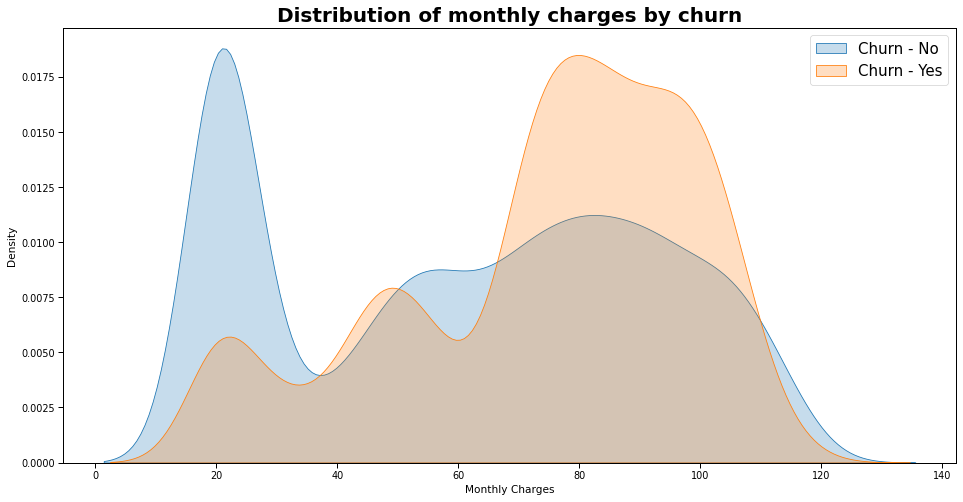

In [43]:
sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(16,8))
ax = sns.kdeplot(df_telco.MonthlyCharges[(df_telco["Churn"] == 0) ], shade = True);
ax = sns.kdeplot(df_telco.MonthlyCharges[(df_telco["Churn"] == 1) ], shade= True);
ax.legend(["Churn - No","Churn - Yes"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn',fontdict={'fontsize':20,'fontweight':'bold'});

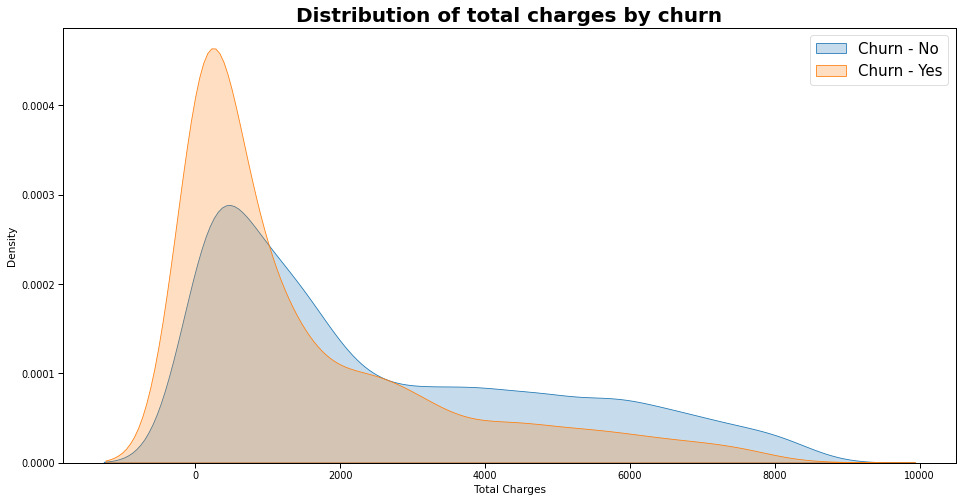

In [44]:
sns.set_context("paper",font_scale=1.1)
_, ax = plt.subplots(figsize=(16,8))
ax = sns.kdeplot(df_telco.TotalCharges[(df_telco["Churn"] == 0) ], shade = True);
ax = sns.kdeplot(df_telco.TotalCharges[(df_telco["Churn"] == 1) ], shade= True);
ax.legend(["Churn - No","Churn - Yes"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Total Charges');
ax.set_title('Distribution of total charges by churn',fontdict={'fontsize':20,'fontweight':'bold'});

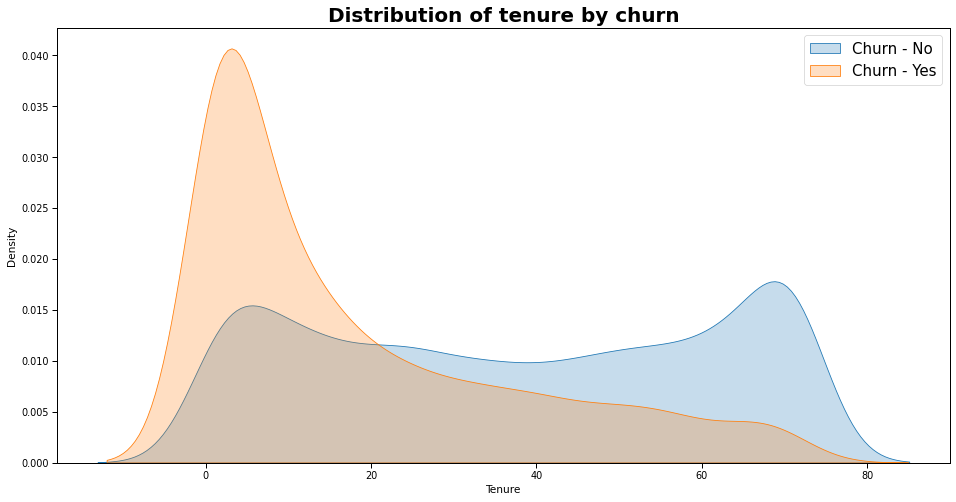

In [45]:
_, ax = plt.subplots(figsize=(16,8))
ax = sns.kdeplot(df_telco.tenure[(df_telco["Churn"] == 0) ], shade = True);
ax = sns.kdeplot(df_telco.tenure[(df_telco["Churn"] == 1) ], ax =ax, shade= True);
ax.legend(["Churn - No","Churn - Yes"],loc='upper right',fontsize=15);
ax.set_ylabel('Density');
ax.set_xlabel('Tenure');
ax.set_title('Distribution of tenure by churn',fontdict={'fontsize':20,'fontweight':'bold'});

### Split the dataset into working and test sets

*df* - working dataset  
*df_test* - test dataset

In [46]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=44)

for train_index, test_index in split.split(df, df["Churn"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [58]:
df = strat_train_set
df_test = strat_test_set

In [59]:
df.shape

(4225, 21)

### Feature engineering on working dataset

### Preparing dataset to machine learning

In [66]:
X_train, X_val, y_train, y_val = train_test_split(df.iloc[:,:-1],
                                                  df.iloc[:,-1],
                                                  test_size = 0.2,
                                                  stratify = df.iloc[:,-1],
                                                  random_state = 44)

In [67]:
X_train.shape

(3380, 20)